<a href="https://colab.research.google.com/github/janlucasdeinhard/pyfiles/blob/master/16_PROJECT_SHS/Metadata_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive,files
drive.mount('/content/mount/')

Mounted at /content/mount/


In [2]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import os,sys,warnings,datetime,time,itertools,math

import pandas as pd

In [3]:
df = pd.read_excel('/content/mount/MyDrive/00_TEMP_DATA/metadata.xlsx')

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [19]:
df['FULLNAME'] = df[['TABLE_CATALOG','TABLE_SCHEMA','TABLE_NAME']].agg('.'.join,axis=1)

In [37]:
df = df.merge(
  df[~df['VALIDFROM_TIMESTAMP'].isna()].groupby(['FULLNAME'],as_index=False)['VALIDFROM_TIMESTAMP'].min().rename(
      columns={'VALIDFROM_TIMESTAMP':'TRACKINGTIME_START'}
  ),
  on='FULLNAME',how='left'
).merge(
    df[~df['VALIDTO_TIMESTAMP'].isna()].groupby(['FULLNAME'],as_index=False)['VALIDTO_TIMESTAMP'].max().rename(
      columns={'VALIDTO_TIMESTAMP':'TRACKINGTIME_MAX'}
  ),
  on='FULLNAME',how='left'
)

In [76]:
df0 = df[df['FULLNAME']=='CRMCL_TOPICAREA.OSC.Accounts']

df0[['VALIDFROM_TIMESTAMP','VALIDTO_TIMESTAMP']] = df0[['VALIDFROM_TIMESTAMP','VALIDTO_TIMESTAMP']].apply(pd.to_datetime)

df0['VALIDFROM_TIMESTAMP'] = df0['VALIDFROM_TIMESTAMP'].dt.date
df0['VALIDTO_TIMESTAMP'] = df0['VALIDTO_TIMESTAMP'].dt.date

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [88]:
tf = pd.DataFrame()

tf['DATE'] = pd.date_range(
    start=pd.to_datetime(df0['TRACKINGTIME_START'].tolist()[0]),
    end=pd.to_datetime(df0['TRACKINGTIME_MAX'].tolist()[0])
)

tf['DATE'] = tf['DATE'].dt.date

tf = tf.merge(
    df0[['VALIDFROM_TIMESTAMP','ROWCOUNT','COLUMNCOUNT','FULLNAME']],
    left_on='DATE',right_on='VALIDFROM_TIMESTAMP',how='left'
).drop(columns=['VALIDFROM_TIMESTAMP']).fillna(method='ffill')

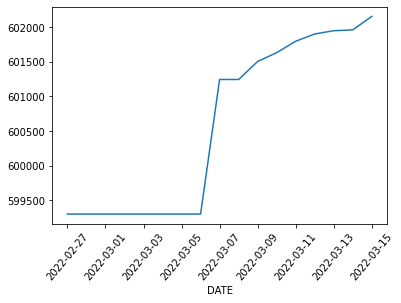

In [92]:
tf.set_index('DATE')['ROWCOUNT'].plot(rot=50)